# Exercise 2

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets

np.random.seed(1234)

In [2]:
x_values = np.random.normal(size = 100)
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = np.random.normal(size = 100)
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

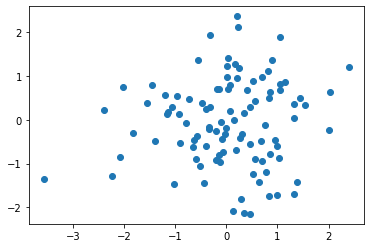

In [3]:
plt.scatter(x_train, y_train)

In [4]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [13]:
inputDim = 1        
outputDim = 1       
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
if torch.cuda.is_available():
    model.cuda()

In [14]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [15]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    print(loss)
    
    loss.backward()

    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(1.0206, grad_fn=<MseLossBackward>)
epoch 0, loss 1.0206456184387207
tensor(1.0180, grad_fn=<MseLossBackward>)
epoch 1, loss 1.017978310585022
tensor(1.0154, grad_fn=<MseLossBackward>)
epoch 2, loss 1.0154132843017578
tensor(1.0129, grad_fn=<MseLossBackward>)
epoch 3, loss 1.0129464864730835
tensor(1.0106, grad_fn=<MseLossBackward>)
epoch 4, loss 1.010574221611023
tensor(1.0083, grad_fn=<MseLossBackward>)
epoch 5, loss 1.0082929134368896
tensor(1.0061, grad_fn=<MseLossBackward>)
epoch 6, loss 1.0060988664627075
tensor(1.0040, grad_fn=<MseLossBackward>)
epoch 7, loss 1.0039888620376587
tensor(1.0020, grad_fn=<MseLossBackward>)
epoch 8, loss 1.0019596815109253
tensor(1.0000, grad_fn=<MseLossBackward>)
epoch 9, loss 1.0000085830688477
tensor(0.9981, grad_fn=<MseLossBackward>)
epoch 10, loss 0.9981318712234497
tensor(0.9963, grad_fn=<MseLossBackward>)
epoch 11, loss 0.99632728099823
tensor(0.9946, grad_fn=<MseLossBackward>)
epoch 12, loss 0.9945915937423706
tensor(0.9929, grad_fn=<Ms

In [8]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 0.1386486 ]
 [-0.13246958]
 [ 0.29541987]
 [ 0.01077392]
 [-0.05575541]
 [ 0.20644855]
 [ 0.20195149]
 [-0.04204544]
 [ 0.06432337]
 [-0.30399004]
 [ 0.24931978]
 [ 0.22353736]
 [ 0.2172386 ]
 [-0.2678776 ]
 [ 0.0072797 ]
 [ 0.06210897]
 [ 0.12788782]
 [ 0.10891074]
 [ 0.2772277 ]
 [-0.19051722]
 [ 0.02871444]
 [-0.04521681]
 [ 0.09330808]
 [ 0.15202239]
 [ 0.27673733]
 [-0.01477426]
 [ 0.17193782]
 [-0.23457065]
 [ 0.03190081]
 [ 0.23446797]
 [-0.00311922]
 [ 0.11679531]
 [ 0.23261032]
 [ 0.2323428 ]
 [ 0.20262487]
 [ 0.0418519 ]
 [ 0.0821026 ]
 [ 0.00911975]
 [ 0.19903   ]
 [ 0.4516989 ]
 [ 0.07419068]
 [-0.03061668]
 [ 0.06765779]
 [-0.2766391 ]
 [ 0.10217527]
 [-0.08455142]
 [ 0.03945399]
 [ 0.06474623]
 [ 0.18496197]
 [ 0.09687108]
 [ 0.1989214 ]
 [-0.17402984]
 [-0.16688061]
 [ 0.04530501]
 [-0.02764791]
 [ 0.03817788]
 [ 0.11949973]
 [ 0.05597177]
 [ 0.15402827]
 [ 0.3138409 ]
 [-0.09712213]
 [ 0.05029114]
 [ 0.11198932]
 [ 0.02775998]
 [ 0.23036332]
 [-0.3297201 ]
 [ 0.39292

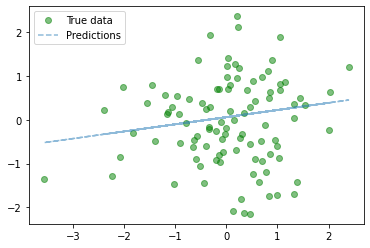

In [9]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()